1. Implement the Harris algorithm using OpenCV. 

In [208]:
import cv2
import numpy as np

# Loading the original image
butterfly_original_image = cv2.imread('fl12929410165-image-kybeoc61.jpg')
butterfly_original_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [209]:
#  Creating a grayscale version of the original image.
butterfly_gray_scale = cv2.cvtColor(butterfly_original_image, cv2.COLOR_BGR2GRAY)
butterfly_gray_scale

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [193]:

# Defining the block size and aperture size for the Sobel operator
block_size = 2
aperture_size = 3

# Computing the Harris corner detector response function
distance = cv2.cornerHarris(butterfly_gray_scale, block_size, aperture_size, k=0.04)
distance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [194]:
# Dilating the detected corners to make them more visible
distance = cv2.dilate(distance, None)
distance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [195]:
# Setting a threshold for the response function
threshold = 0.01 * distance.max()
threshold

0.0008811458945274354

In [196]:
# Creating an image copy to draw the detected corners
butterfly_image_corner = np.copy(butterfly_original_image)
butterfly_image_corner

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [210]:
# Iterating over all the pixels in the response function
for itr in range(distance.shape[0]):
    for itr1 in range(distance.shape[1]):
        # If the pixel value is above the threshold, it's a corner
        if distance[itr,itr1] > threshold:
            # Draw a circle around the corner
            cv2.circle(butterfly_image_corner, (itr1,itr), radius=3, color=(0,255,0), thickness=2)

# Displaying the original image with the detected corners
cv2.imshow('corners', butterfly_image_corner)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Implement Image Pyramid using OpenCV

In [198]:
import cv2

# Load the image
butterfly_image = cv2.imread('fl12929410165-image-kybeoc61.jpg')

# Display the original image
cv2.imshow('Original', butterfly_image)

In [199]:
# Create an image pyramid
butterfly_pyramid = [butterfly_image]
butterfly_pyramid

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [211]:
cv2.imshow('Original', butterfly_image)

itr=0
while itr<10:
    percentage_to_scale=0.75
    original_width=butterfly_image.shape[1]
    new_width = int(original_width * percentage_to_scale)
    original_height=butterfly_image.shape[0]
    new_height = int(original_height * percentage_to_scale)
    butterfly_image = cv2.resize(butterfly_image, (new_width, new_height))
    butterfly_pyramid.append(butterfly_image)
    itr=itr+1

# Display the image pyramid
for i in range(len(butterfly_pyramid)):
    cv2.imshow(f'Level {i}', butterfly_pyramid[i])

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()


 3. Implement Image Segmentation with Watershed Algorithm using OpenCV.

In [212]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('fl12929410165-image-kybeoc61.jpg')

# Convert the image to grayscale and apply thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to remove noise and fill holes
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Apply Watershed algorithm to segment the image
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown==255] = 0
markers = cv2.watershed(image, markers)
image[markers==-1] = [255,0,0]

# Display the segmented image
cv2.imshow('Segmented Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


4. Implement SIFT algorithm using OpenCV.

In [213]:
import cv2

# Load the image
image = cv2.imread('fl12929410165-image-kybeoc61.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
cv2.imshow('Image with SIFT keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


5. Implement object detection using YOLO on the COCO dataset. Provide the results for any 5 images (for testing purposes) from the dataset. 

In [203]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [204]:
with open("coco.names", "r") as f:
    objects_to_detect = [line.strip() for line in f.readlines()]

print(objects_to_detect[5:])

['bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [205]:
model = cv2.dnn_DetectionModel("yolov3.weights", "yolov3.cfg")
model.setInputParams(scale=1/255, size=(608, 608))

In [206]:
import numpy as np
import cv2
box_colors=np.random.uniform(0,255,size=(len(items),3))

def draw_object_box(image, class_id, confidence, x_min, y_min, x_max, y_max):
    label = str(objects_to_detect[class_id])
    color = box_colors[class_id]
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
    cv2.putText(image, label+' '+str(confidence), (x_min-10, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)


imgs//
[[[192 192 162]
  [190 189 161]
  [186 182 157]
  ...
  [ 54 132 179]
  [ 49 128 167]
  [ 40 119 158]]

 [[193 194 168]
  [189 190 164]
  [183 180 159]
  ...
  [ 50 134 182]
  [ 47 130 175]
  [ 37 123 165]]

 [[195 200 179]
  [188 193 172]
  [178 179 163]
  ...
  [ 42 135 190]
  [ 38 133 183]
  [ 31 128 178]]

 ...

 [[ 81 182 156]
  [ 81 182 156]
  [ 81 182 156]
  ...
  [103 180 182]
  [103 183 182]
  [111 188 190]]

 [[ 81 182 156]
  [ 81 182 156]
  [ 81 182 156]
  ...
  [110 182 192]
  [111 186 194]
  [118 190 200]]

 [[ 81 182 157]
  [ 81 182 157]
  [ 81 182 157]
  ...
  [118 187 204]
  [119 190 204]
  [126 195 212]]]
(608, 608, 3)


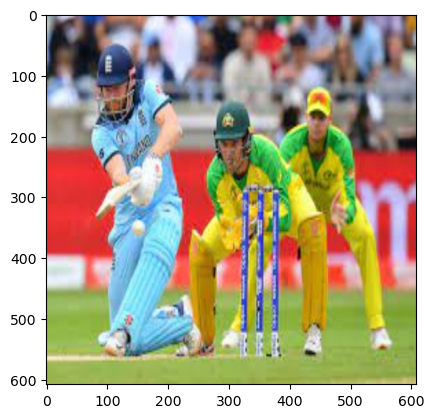

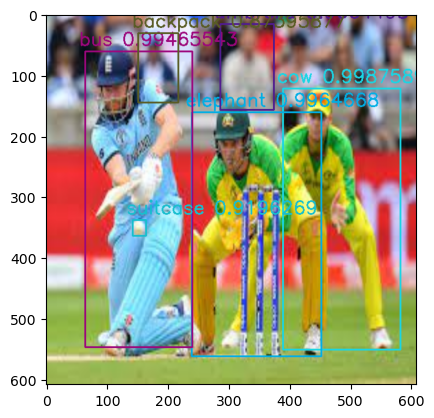

imgs//
[[[ 22  60  54]
  [ 22  60  54]
  [ 23  61  55]
  ...
  [ 69 113  52]
  [ 72 120  61]
  [ 78 126  67]]

 [[ 24  60  54]
  [ 22  60  54]
  [ 23  61  55]
  ...
  [ 66 110  49]
  [ 68 116  57]
  [ 76 121  64]]

 [[ 26  60  54]
  [ 24  60  54]
  [ 24  60  54]
  ...
  [ 61 102  44]
  [ 63 108  51]
  [ 72 114  59]]

 ...

 [[153 227 229]
  [153 227 227]
  [153 227 229]
  ...
  [137 177 175]
  [127 201 197]
  [144 218 214]]

 [[157 225 230]
  [155 226 229]
  [157 225 230]
  ...
  [143 183 181]
  [133 204 201]
  [149 220 217]]

 [[159 224 232]
  [157 225 230]
  [159 224 232]
  ...
  [179 223 222]
  [157 225 224]
  [158 226 225]]]
(608, 608, 3)


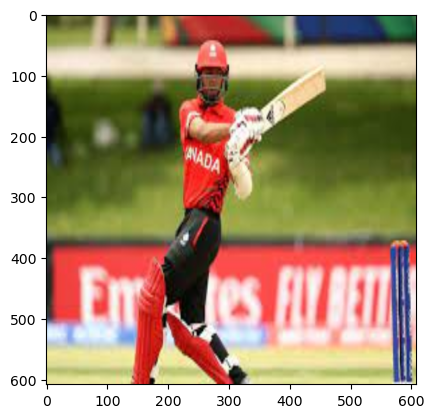

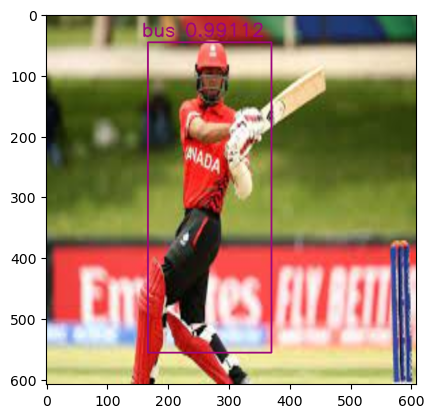

imgs//
[[[ 56  61  59]
  [ 36  45  42]
  [ 18  32  28]
  ...
  [ 22  26  21]
  [ 22  25  23]
  [ 22  25  23]]

 [[ 54  59  57]
  [ 34  43  40]
  [ 20  34  30]
  ...
  [ 24  28  23]
  [ 22  27  25]
  [ 24  27  25]]

 [[ 54  59  57]
  [ 33  42  39]
  [ 22  36  32]
  ...
  [ 25  31  26]
  [ 24  31  28]
  [ 25  30  28]]

 ...

 [[ 66 174 168]
  [ 66 174 168]
  [ 67 175 169]
  ...
  [ 81 181 183]
  [ 80 181 183]
  [ 80 181 183]]

 [[ 66 174 168]
  [ 67 175 169]
  [ 68 176 170]
  ...
  [ 79 180 182]
  [ 79 180 182]
  [ 79 180 182]]

 [[ 68 176 170]
  [ 69 177 171]
  [ 69 177 171]
  ...
  [ 78 179 181]
  [ 76 179 181]
  [ 76 179 181]]]
(608, 608, 3)


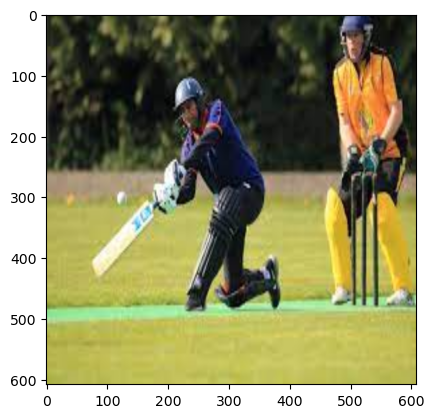

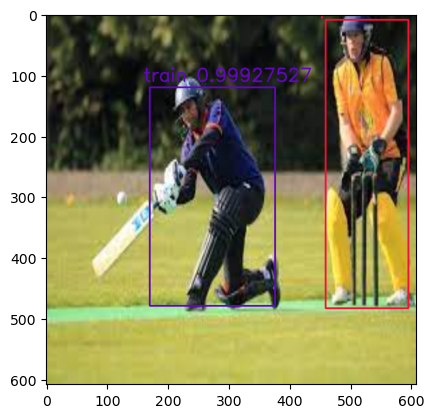

imgs//
[[[ 76 135 127]
  [ 67 126 118]
  [ 36  95  87]
  ...
  [ 15  55  37]
  [ 15  54  38]
  [ 15  54  38]]

 [[ 68 127 119]
  [ 73 132 124]
  [ 62 121 113]
  ...
  [ 33  75  57]
  [ 33  75  58]
  [ 35  74  58]]

 [[ 86 143 135]
  [ 81 138 130]
  [ 71 128 120]
  ...
  [ 47  92  73]
  [ 47  91  74]
  [ 49  91  74]]

 ...

 [[ 91 143 155]
  [ 97 149 161]
  [ 96 148 160]
  ...
  [ 74 121 125]
  [ 76 121 124]
  [ 76 121 124]]

 [[ 89 142 155]
  [ 90 143 156]
  [ 89 142 155]
  ...
  [ 73 121 122]
  [ 73 121 122]
  [ 73 121 122]]

 [[ 87 142 155]
  [ 88 143 156]
  [ 87 142 155]
  ...
  [ 73 122 120]
  [ 73 122 120]
  [ 73 122 120]]]
(608, 608, 3)


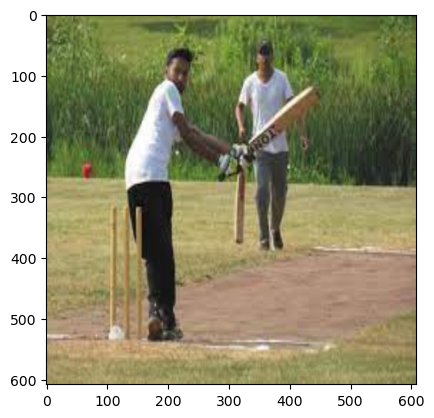

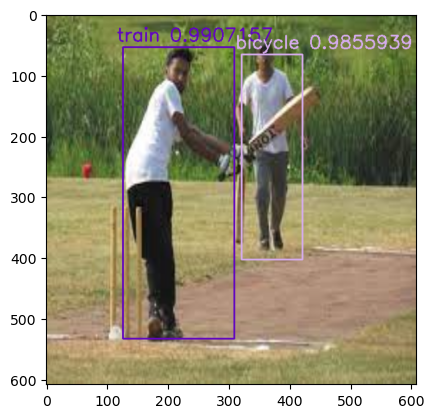

imgs//
[[[ 20  43  35]
  [ 16  39  31]
  [ 13  34  26]
  ...
  [ 14  17  15]
  [ 14  17  15]
  [ 18  16  15]]

 [[ 20  43  35]
  [ 18  39  31]
  [ 13  34  26]
  ...
  [ 16  21  19]
  [ 16  21  19]
  [ 18  21  19]]

 [[ 22  43  35]
  [ 18  39  31]
  [ 15  33  26]
  ...
  [ 14  25  22]
  [ 16  25  22]
  [ 18  25  22]]

 ...

 [[159 204 207]
  [155 201 202]
  [157 202 205]
  ...
  [160 195 205]
  [168 203 213]
  [176 211 221]]

 [[162 196 202]
  [158 193 197]
  [162 196 202]
  ...
  [175 210 220]
  [177 212 222]
  [178 214 224]]

 [[201 230 237]
  [197 226 233]
  [199 228 235]
  ...
  [156 191 201]
  [151 186 196]
  [144 180 190]]]
(608, 608, 3)


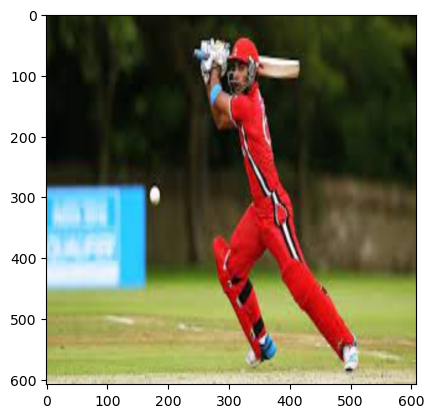

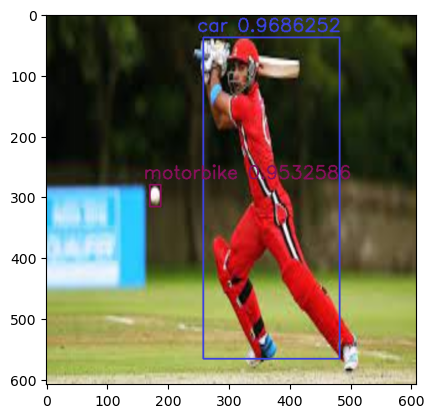

In [207]:
import os
import matplotlib.pyplot as plt

image_dirctory = r"imgs//"
for file in os.listdir(image_dirctory): 
    image = cv2.imread(os.path.join(image_dirctory, file))
    print(image_dirctory)
    print(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (608, 608))
    print(image.shape)
    plt.imshow(image)
    plt.show()
    
    class_ids, confidences, bounding_boxes = model.detect(image, confThreshold=0.72)
    boxes = np.array(bounding_boxes).tolist()
    scores = np.array(confidences).reshape(-1).tolist() 
    indices = np.array(cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.8, nms_threshold=0.2)).reshape(-1)
        
    for index in indices:
        box = boxes[index]
        draw_object_box(image, index, confidences[index], round( box[0]), round(box[1]), round(box[0]+box[2]), 
                        round(box[1]+box[3]))
            
    plt.imshow(image)
    plt.show()
